In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import scipy.stats as ss
import pickle

In [3]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

In [9]:
feat = pd.read_pickle('./datasets/soft/gen/feat.pkl')

In [10]:
feat.head()

,Dismissed,HalfBonusRate,YearBonusRate,BonusRate,TimeToPrevBonus,PrevBonusBiggerMean,BonusPosMeanDiff,PosBonusQuant,BonusCompar,MeanBonus1,MeanBonus2,MeanBonus3,HalfWageRate,YearWageRate,WageRate,WageBiggerPosGeoMean,WageBiggerPosStrMean,WagePosGeoDiff,WagePosStrDiff,WagePosQuant,WagePosLangQuant,WageCompar,TimeWageRate,WageProjPosDiff,LangPosBiggerMode,HalfLangRate,YearLangRate,LangRate,LangCompar,LangPosProjBiggerMode,LangPosToMode1,LangPosToMode2,LangPosToMode3,PosPerMean,PosPerBiggerMean,IsTop5Pos,PosGeoNum,PosStrNum,PosLevGeoNum,HalfPosRate,YearPosRate,PosRate,PosRateCompar,FormPosMonths,LastLevelPeriod,RestLevel,WasTrainee,CustTimeMean,CustTimeBiggerMean,CustDismNum,CustNumProj,CustNumEmp,CustDismRate,ProjPerBiggerMean,ProjNumEmp,HalfProjRate,YearProjRate,ProjRate,ProjRateCompar,MonthsOnProject,ProjPosCount1,ProjPosCount2,ProjPosCount3,3MonthsUtilBiggerMean,HalfUtilRate,YearUtilRate,UtilRate,UtilRateCompar,IntProjTime,IsIntProjNow,IsIntProjLastPos,IsHalfVac,IsYearVac,HalfVacRate,YearVacRate,VacRate,VacRateCompar,MeanHourVacation,IsQuartOnSite,HalfOnSiteRate,YearOnSiteRate,OnSiteRate,OnSiteRateCompar,OnSitePosBiggerMean,CompGeoNum,WorkingPeriod,DevCenterID,SBUID,PositionID,PositionLevel,LanguageLevelID,Utilization,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,APM,MonthOnSalary
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,0,0.0,0.0,0.15,4,0,-1.673226e+02,2,0.0,3,3,4,0.016850,0.016850,0.010110,0,0,0.000000,-0.343149,1,1,1.666667,2,-0.299159,0,0.0,0.0,0.0,0.0,1,0.0,-8.0,0.0,6.666667,0,0,1,1,1,0.500000,0.250000,0.15,3.333333,0,1,0,False,9.715596,1,8.0,23,109,0.073394,0,19.0,0.333333,0.250000,0.15,2.222222,3,1.0,1.0,1.0,1,1.0,0.964283,0.91757,1.089835,0,0,0,1,1,0.666667,0.583333,0.60,1.111111,17.0,0,0.0,0.0,0.0,0.0,0,12,68,3,284,71,3,11,1.0,15,1,22,34,1
001502BB-B61A-404D-8A99-CC5DE5A4F985,1,0.0,0.0,0.00,10000,0,3.165567e+00,0,0.0,3,0,0,0.000000,0.000000,0.000000,0,0,-0.346939,-0.229018,1,1,0.000000,2,-0.368615,1,0.0,0.0,0.0,0.0,0,9.0,100.0,100.0,10.000000,1,1,118,4,118,0.166667,0.100000,0.10,1.666667,0,10,0,False,10.585374,0,407.0,731,2899,0.140393,0,1.0,0.000000,0.000000,0.00,0.000000,0,1.0,1.0,1.0,0,0.0,0.000000,0.00000,0.000000,10,1,1,0,0,0.000000,0.000000,0.00,0.000000,0.0,0,0.0,0.0,0.0,0.0,0,121,121,1,55,203,2,20,0.0,23,0,1,0,10
001AAE0C-4EE9-43DB-BE7C-A6D08D061A9A,0,0.0,0.0,0.05,6,1,2.416667e+02,4,0.0,3,0,0,0.000000,0.007456,0.004474,1,1,0.056520,0.053002,4,4,0.000000,4,0.000000,0,0.0,0.0,0.5,0.0,0,0.0,100.0,100.0,20.000000,1,0,1,1,1,0.166667,0.083333,0.05,3.333333,0,20,0,False,10.585374,1,407.0,731,2899,0.140393,0,8.0,0.500000,0.250000,0.15,3.333333,1,1.0,1.0,1.0,0,0.0,0.000000,0.00000,0.000000,20,1,1,1,1,0.333333,0.500000,0.35,0.952381,15.2,0,0.0,0.0,0.0,0.0,0,775,47,1,120,89,2,15,0.0,0,-1,22,0,8
0034ECA4-0562-4AC7-A826-4AE81C64D69F,0,0.0,0.0,0.15,3,0,-1.692697e+02,2,0.0,2,4,4,0.020389,0.016387,0.021105,0,0,-0.124694,-0.275026,1,1,0.966068,1,-0.436666,0,0.0,0.0,0.4,0.0,1,0.0,0.0,8.0,5.000000,0,0,25,12,25,0.333333,0.250000,0.20,1.666667,10,1,0,False,8.945312,1,13.0,30,128,0.101562,0,18.0,0.166667,0.166667,0.10,1.666667,7,3.0,1.0,2.0,1,1.0,1.000000,0.95808,1.043754,0,0,0,1,1,0.500000,0.583333,0.50,1.000000,12.8,0,0.0,0.0,0.0,0.0,0,1,40,2,272,15,3,19,1.0,16,1,22,55,3
00384806-F711-41BA-A924-8F27E996F891,0,0.0,0.0,0.00,10000,0,-9.318593e-15,0,0.0,3,0,0,0.000000,0.001137,0.000682,0,0,-0.040631,-0.019252,2,2,0.000000,2,-0.050340,1,0.0,0.0,0.0,0.0,0,7.0,100.0,100.0,20.000000,1,0,89,6,89,0.166667,0.083333,0.05,3.333333,0,20,0,False,10.585374,1,407.0,731,2899,0.140393,0,1.0,0.000000,0.000000,0.00,0.000000,0,1.0,1.0,1.0,0,0.0,0.000000,0.00000,0.000000,20,1,1,0,0,0.000000,0.000000,0.00,0.000000,0.0,0,0.0,0.0,0.0,0.0,0,447,45,1,55,206,1,18,0.0,17,1,22,0,9


<AxesSubplot:>

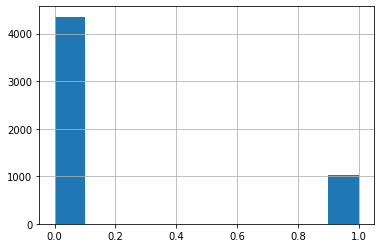

In [11]:
feat['Dismissed'].hist()

In [12]:
cat_cols = ['PrevBonusBiggerMean', 'WageBiggerPosGeoMean', 'WageBiggerPosStrMean', 'LangPosBiggerMode', 'PosPerBiggerMean', 'CustTimeBiggerMean', 'ProjPerBiggerMean', 
            '3MonthsUtilBiggerMean', 'IsIntProjNow', 'IsIntProjLastPos', 'IsHalfVac', 'IsYearVac', 'IsQuartOnSite', 'IsTop5Pos', 'WasTrainee',
            'DevCenterID', 'SBUID', 'PositionID', 'CompetenceGroupID', 'FunctionalOfficeID', 'PaymentTypeId']
num_cols = [col for col in feat.columns.values if col not in cat_cols + ['Dismissed']]

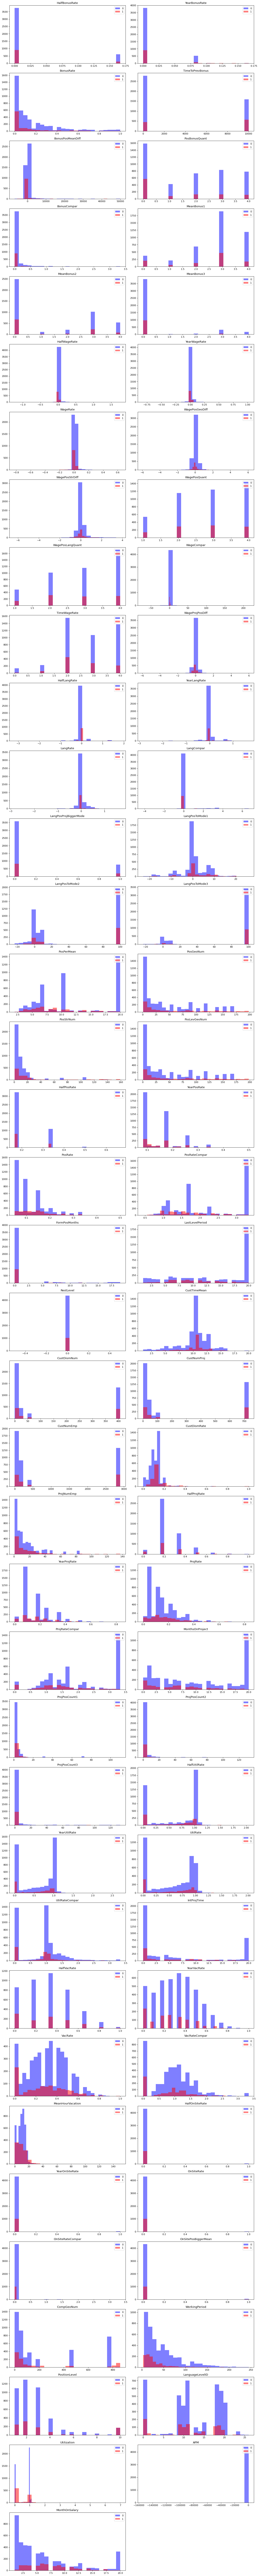

In [25]:
df = feat

plt.figure(figsize=(15, 150), dpi=80)

def sephist(df, by, col):
    no_dism = df[df[by] == 0][col]
    dism = df[df[by] == 1][col]
    return no_dism, dism

cols = num_cols
for num, col in enumerate(cols):
    plt.subplot((len(cols) + 1) // 2, 2, num + 1)
    sep_dfs = sephist(feat, 'Dismissed', col)
    plt.hist(sep_dfs[0], bins=25, alpha=0.5, label='0', color='b')
    plt.hist(sep_dfs[1], bins=25, alpha=0.5, label='1', color='r')
    plt.legend(loc='upper right')
    plt.title(col)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Constant features / many NaN: RestLevel, all features related to OnSite.

In [30]:
# boxplots => outliers
# df = feat

# for col in num_cols:
#     sns.boxplot(x="Dismissed", y=col, data=df)
#     plt.show()

In [ ]:
# APM

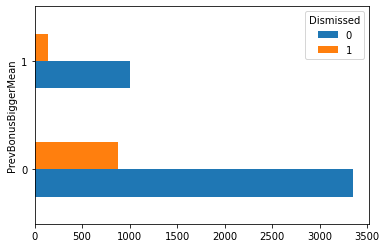

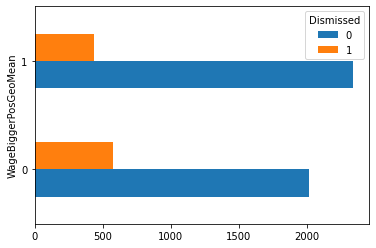

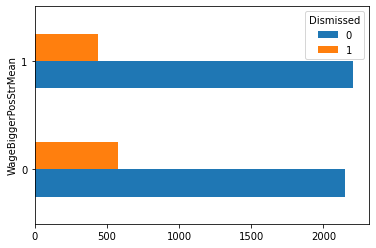

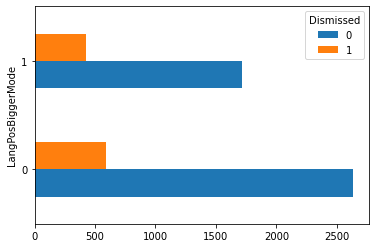

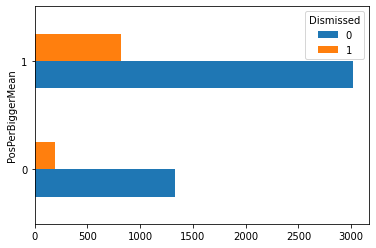

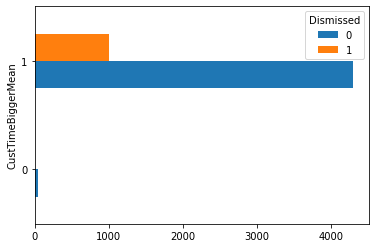

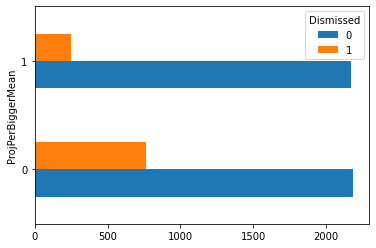

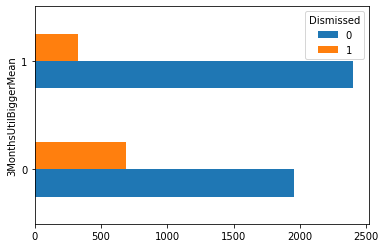

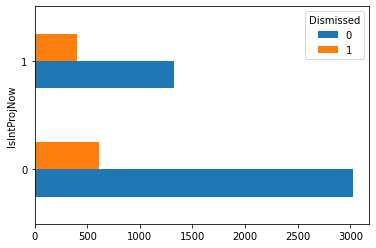

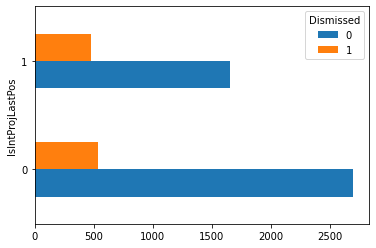

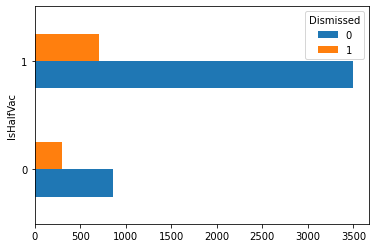

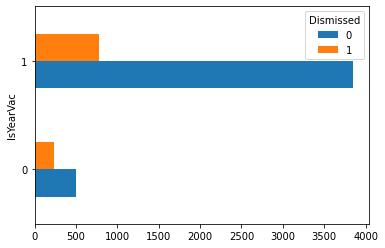

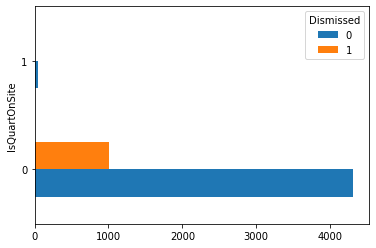

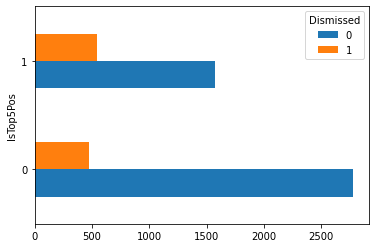

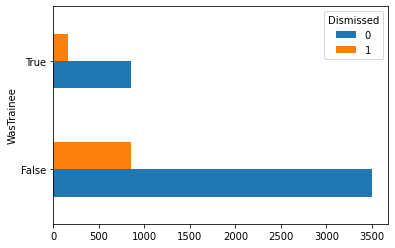

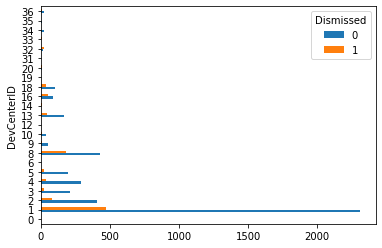

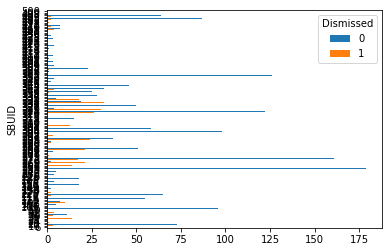

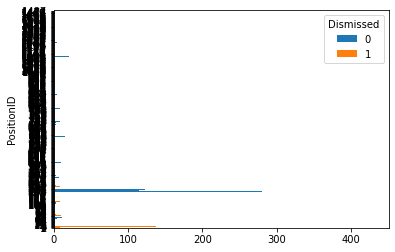

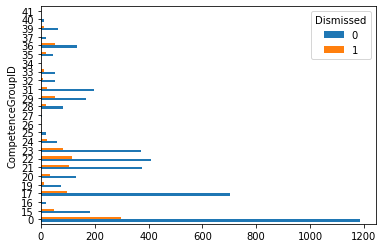

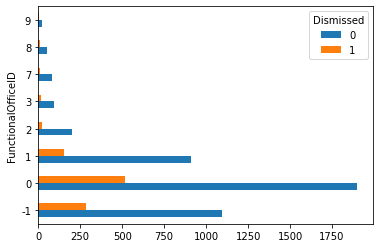

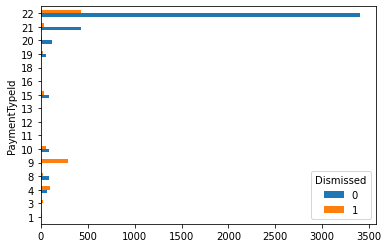

In [23]:
for col in cat_cols:
    feat.groupby('Dismissed')[col].value_counts().unstack(0).plot.barh()
    plt.show()

Plot bar charts of categorical features.
1. Look at distribution.
2. Check if a feature is almost constant.

Constant features: CustTimeBiggerMean, IsQuantOnSite. Can remove them. 